<a href="https://colab.research.google.com/github/yeyevtushenko/IntroductionIAD/blob/main/%D0%92%D1%81%D1%82%D1%83%D0%BF_%D0%B4%D0%BE_%D1%96%D0%BD%D1%82%D0%B5%D0%BB%D0%B5%D0%BA%D1%82%D1%83%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7%D1%83_%D0%B4%D0%B0%D0%BD%D0%B8%D1%85_%D0%91%D0%A1_25_%D0%84%D0%B2%D1%82%D1%83%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%84%D0%B3%D0%BE%D1%80_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Практична робота №2

Завдання:
1.             Реалізувати кластеризацію у вигляді функції. В якості метрики відстані використовувати квадрат відстані Евкліда.
2.             Провести кластерний аналіз з розбиттям на 3, 4 та 5 кластерів на  даних.
3.             Візуалізувати результати кластеризації.
4.             Реалізувати розрахунок коефіцієнту «силуету». Визначити найбільш вірогідне (точне) розбиття за даною метрикою.
5.             Зробити висновки про теоретичну оптимальну кількісті кластерів.


## Теоретична частина

###Що таке кластеризація?

Кластеризація - це неконтрольована техніка машинного навчання. Неконтрольована означає, що у нас немає попередньо маркованих даних (наприклад, «червоні цукерки» або «шоколадні цукерки»). Замість цього алгоритм автоматично знаходить групи (кластери) в даних на основі схожості між точками даних.

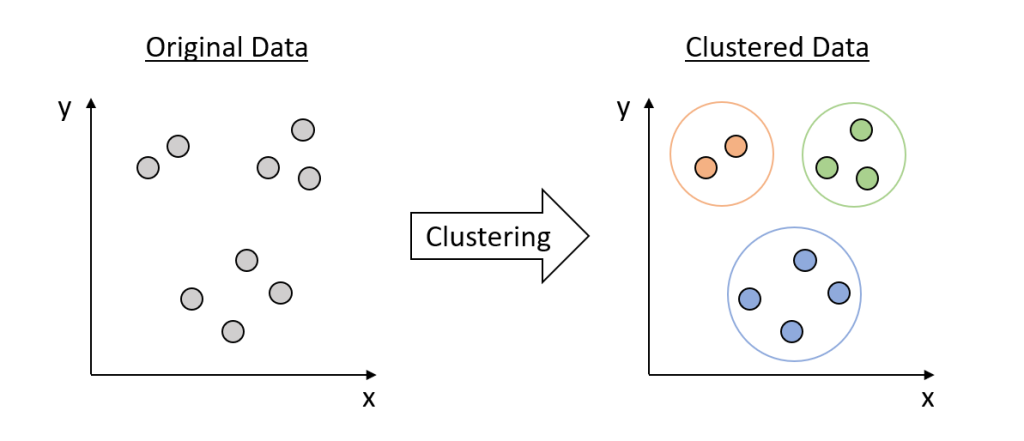

### Чому нормалізація важлива для кластеризації

Уявіть, що у вас є набір даних з двома характеристиками: зріст (у сантиметрах) і вага (у кілограмах). Якщо ви запустите кластеризацію безпосередньо на цих даних, зріст буде домінувати в розрахунках відстані, оскільки його значення набагато більші. Це може призвести до оманливих кластерів, коли точки з однаковою вагою будуть розділені через різну висоту.

Нормалізація приходить на допомогу! Вона перетворює ваші дані на загальну шкалу, гарантуючи, що всі об'єкти однаково впливають на обчислення відстані. Поширені методи нормалізації включають:

* **Масштабування Min-Max:** Масштабує кожен об'єкт до діапазону від 0 до 1 (або від -1 до 1).
* **Стандартна нормалізація (Z-рахунок):** Віднімається середнє значення кожної ознаки, а потім ділиться на її стандартне відхилення. Це призводить до стандартного нормального розподілу із середнім значенням 0 і стандартним відхиленням 1.

![](https://i.stack.imgur.com/VAbv8.png)

###Розуміння кластеризації за методом K-середніх

K-середні - це алгоритм кластеризації на основі центроїда, який чудово групує точки даних у заздалегідь визначену кількість кластерів (K). Ось розбивка його кроків:

1. **Вибір кількості кластерів (K):** Це дуже важливо! Чарівної формули не існує, але такі методи, як метод ліктя (побудова графіка функції витрат в залежності від K) або Силуетний аналіз (оцінка якості кластерів) можуть допомогти вам у цьому.

2. **Ініціалізація центроїдів:** K-Means випадковим чином вибирає K точок даних як початкові центри кластерів (центроїди). Ці центроїди представляють «ядра» кожного кластера.

3. **Присвоєння точок даних:** Кожна точка даних присвоюється найближчому центроїду на основі обраної метрики відстані (наприклад, евклідова відстань).

4. **Перерахунок центроїдів:** Після того, як всі точки призначені, центроїди перераховуються як середнє значення точок, що належать до кожного кластеру.

5. **Повторення кроків 3 та 4:** Ці кроки (призначення та оновлення центроїдів) повторюються доти, доки не буде досягнуто критерію зупинки (наприклад, центроїди не змістяться суттєво, або не буде досягнуто максимальної кількості ітерацій).

Переваги K-середніх:

* **Ефективність:** K-середні є відносно швидким та ефективним в обчислювальному плані, що робить його придатним для великих наборів даних.
* **Простий у розумінні:** Концепцію K-середніх легко зрозуміти, що робить його чудовою відправною точкою для початківців у кластеризації.
* **Результати, які можна інтерпретувати:** K-середнє розподіляє точки даних на певні кластери, що полегшує інтерпретацію угруповань.

**Важливо пам'ятати:**

* K-середні чутливі до викидів, які можуть спотворювати центри кластерів. Розгляньте методи виявлення та обробки викидів.
* K-Means передбачає сферичні кластери. Якщо ваші дані мають витягнуту або неправильну форму, K-середнє може бути не найкращим вибором.
* Початкове розміщення центроїдів може вплинути на остаточні кластери. Експериментуйте з різними ініціалізаціями, щоб уникнути застрягання в локальних оптимумах.

![](https://www.projectrhea.org/rhea/images/e/ef/RunyanKmeans.gif)

#### Метод «ліктя» для вибору K

Важливим етапом кластеризації є вибір оптимальної кількості кластерів (K). Метод ліктя - це візуальна техніка, яка допомагає прийняти це рішення:

1. Запустіть алгоритм кластеризації для різних значень K.
2. Відкладіть функцію вартості (часто SSE) на осі y та кількість кластерів (K) на осі x.
3. Спостерігайте за кривою. Спочатку функція витрат буде швидко зменшуватися зі збільшенням K, що свідчить про формування більш тісних кластерів.
4. Точка «ліктя» на кривій вказує на хороше значення K, коли витрати починають повільно зменшуватися, що свідчить про зменшення прибутку від додавання нових кластерів.

#### Візуалізація якості кластерів за допомогою силуетних діаграм

Силуетні діаграми надають графічне представлення коефіцієнта силуету для кожної точки даних. Ось як їх інтерпретувати:

1. На діаграмі кожна точка даних відображається на осі х, а її коефіцієнт силуету - на осі у.
2. Точки з коефіцієнтом силуету ближче до 1 добре узгоджуються з відповідним кластером.
3. Значення, близькі до 0, вказують на те, що точка знаходиться на межі кластерів і потенційно може належати до будь-якого з них.
4. Від'ємні значення вказують на те, що точка може бути неправильно віднесена до поточного кластеру.

## Практична частина

У тестовому форматі для виконання практичної роботи файл у форматі .xlsx був переведений у формат .csv. Це дає змогу завантажити дані у github для легкого використання

###Імпорт модулів

In [76]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

###Завантаження даних

In [77]:
data = pd.read_csv("https://raw.githubusercontent.com/yeyevtushenko/IntroductionIAD/refs/heads/Data/prostate.csv")

In [78]:
data.head()

,patno,stage,rx,dtime,status,age,wt,pf,hx,sbp,dbp,ekg,hg,sz,sg,ap,bm,sdate
0,1,3,0.2 mg estrogen,72,alive,75.0,76.0,normal activity,0,15,9,heart strain,13.798828,2.0,8.0,0.299988,0,2778
1,2,3,0.2 mg estrogen,1,dead - other ca,54.0,116.0,normal activity,0,13,7,heart block or conduction def,14.599609,42.0,NaN,0.699951,0,2820
2,3,3,5.0 mg estrogen,40,dead - cerebrovascular,69.0,102.0,normal activity,1,14,8,heart strain,13.398438,3.0,9.0,0.299988,0,2933
3,4,3,0.2 mg estrogen,20,dead - cerebrovascular,75.0,94.0,in bed < 50% daytime,1,14,7,benign,17.597656,4.0,8.0,0.899902,0,2999
4,5,3,placebo,65,alive,67.0,99.0,normal activity,0,17,10,normal,13.398438,34.0,8.0,0.500000,0,3002


### Вибір варіанту для виконання роботу

In [79]:
N = int(input("Enter your variant: "))
P = int(input("Enter your num of group: "))

start_index = N * 10 + P + 1
end_index = N * 10 + P + 30

data = data.iloc[start_index:end_index]

Enter your variant: 8
Enter your num of group: 25


In [80]:
data

,patno,stage,rx,dtime,status,age,wt,pf,hx,sbp,dbp,ekg,hg,sz,sg,ap,bm,sdate
106,107,4,0.2 mg estrogen,17,dead - heart or vascular,70.0,83.0,in bed < 50% daytime,0,14,6,normal,12.699219,14.0,11.0,9.699219,1,2660
107,108,4,5.0 mg estrogen,70,dead - other ca,76.0,92.0,normal activity,0,13,6,heart strain,9.699219,6.0,10.0,6.199219,1,2660
108,109,4,placebo,74,alive,77.0,93.0,normal activity,0,10,6,benign,11.000000,0.0,12.0,4.899414,0,2714
109,110,4,0.2 mg estrogen,74,alive,77.0,99.0,normal activity,1,17,9,normal,12.798828,15.0,12.0,2.399902,0,2723
110,111,4,1.0 mg estrogen,20,dead - heart or vascular,70.0,103.0,normal activity,1,12,7,normal,13.500000,23.0,11.0,10.199219,0,2786
111,112,4,placebo,2,dead - prostatic ca,73.0,80.0,normal activity,1,13,8,heart strain,12.898438,61.0,12.0,39.695312,0,2867
112,113,4,0.2 mg estrogen,8,dead - prostatic ca,63.0,119.0,normal activity,1,13,8,heart strain,12.798828,14.0,15.0,41.695312,1,2936
113,114,4,5.0 mg estrogen,27,dead - other specific non-ca,71.0,91.0,normal activity,0,13,6,heart strain,12.000000,1.0,10.0,1.199951,0,2966
114,115,4,1.0 mg estrogen,23,dead - cerebrovascular,78.0,103.0,in bed < 50% daytime,1,14,8,normal,10.000000,38.0,12.0,1.799805,1,2994
115,116,4,placebo,1,dead - heart or vascular,74.0,100.0,normal activity,1,13,8,old MI,14.398438,1.0,11.0,1.099854,0,3294


##### 1. Функція для кластеризації

In [81]:
def kmeans_clustering(data, n_clusters):
    model = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    clusters = model.fit_predict(data)
    return clusters, model

####2. Проведення кластерного аналізу для 3, 4 та 5 кластерів

In [82]:
def perform_clustering(data):
    results = {}
    for n_clusters in [3, 4, 5]:
        clusters, model = kmeans_clustering(data, n_clusters)
        silhouette_avg = silhouette_score(data, clusters)
        results[n_clusters] = {
            'clusters': clusters,
            'model': model,
            'silhouette': silhouette_avg
        }
    return results

##### 3. Візуалізація результатів кластеризації

In [83]:
def visualize_clusters(data, clusters, title):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(data)
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis')
    plt.title(title)
    plt.show()

#### 4. Внутрішньокластерні відстані

In [84]:
def calculate_intra_cluster_distance(model, data):
    distances = []
    for i, center in enumerate(model.cluster_centers_):
        cluster_data = data[model.labels_ == i]
        intra_distance = np.mean(np.linalg.norm(cluster_data - center, axis=1))
        distances.append(intra_distance)
    return distances

#### 5. Міжкластерні відстані

In [85]:
def calculate_inter_cluster_distance(model):
    centers = model.cluster_centers_
    distances = []
    for i in range(len(centers)):
        for j in range(i + 1, len(centers)):
            inter_distance = np.linalg.norm(centers[i] - centers[j])
            distances.append(inter_distance)
    return distances

#### 6. Проведення кластерного аналізу

In [86]:
# Вибір числових стовпців для кластеризації
data = data.select_dtypes(include=['float64', 'int64'])

# Вибір підходу для обробки пропущених значень
v = int(input("Оберіть спосіб обробки пропусків (1 - видалити пропуски, 2 - замінити на середнє): "))

if v == 1:
    # Видалення рядків з пропущеними значеннями
    data = data.dropna()
    print("Пропуски видалено")
else:
    # Заповнення пропусків середнім значенням
    data = data.fillna(data.mean())
    print("Пропуски заповнено середнім значенням")

# Виконання кластерного аналізу
results = perform_clustering(data)

Оберіть спосіб обробки пропусків (1 - видалити пропуски, 2 - замінити на середнє): 2
Пропуски заповнено середнім значенням


#### 7. Візуалізація та виведення результатів для кожної кількості кластерів

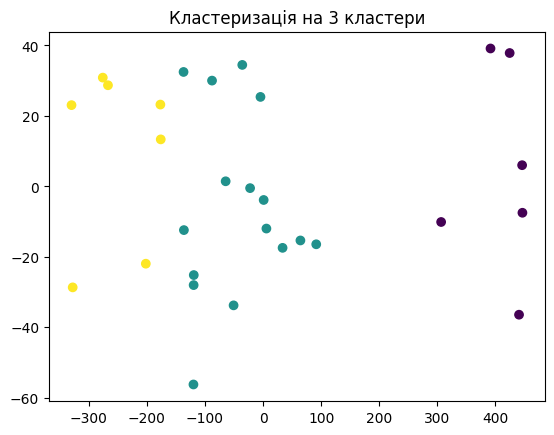

Силует для 3 кластерів: 0.5438426071945164
Внутрішньокластерні відстані для 3 кластерів: [58.27003940078333, 72.93632835167388, 63.58558230376456]
Міжкластерні відстані для 3 кластерів: [453.26120865567026, 659.793961660162, 208.02854334256392]


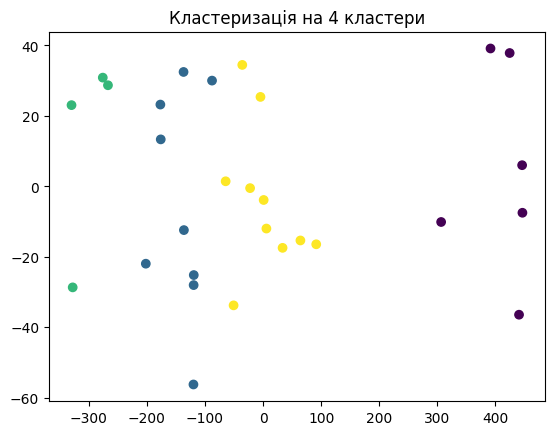

Силует для 4 кластерів: 0.5414752633153048
Внутрішньокластерні відстані для 4 кластерів: [58.27003940078333, 48.29344231491264, 38.360461154655894, 50.55174074134851]
Міжкластерні відстані для 4 кластерів: [550.8684358899834, 709.2288660943696, 407.66523123098267, 160.72071515224465, 143.90689543925222, 303.1968221763623]


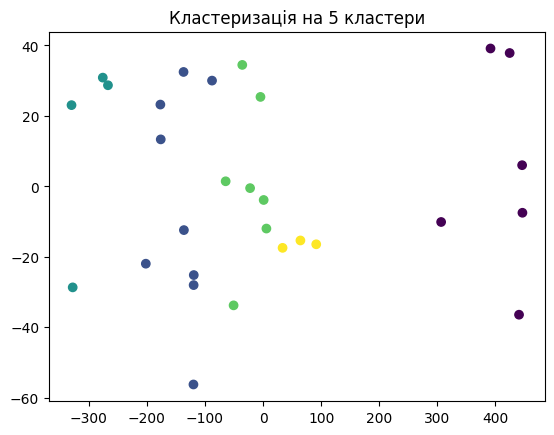

Силует для 5 кластерів: 0.4846015115499086
Внутрішньокластерні відстані для 5 кластерів: [58.27003940078333, 48.29344231491264, 38.360461154655894, 38.822184701699264, 22.68839160477285]
Міжкластерні відстані для 5 кластерів: [550.8684358899834, 709.2288660943696, 433.72485116863663, 347.931305954533, 160.72071515224465, 117.81750640808762, 206.56321948212914, 276.60926068315376, 365.95730497834774, 92.78726075421008]


In [87]:
for n_clusters, result in results.items():
    visualize_clusters(data, result['clusters'], f"Кластеризація на {n_clusters} кластери")
    print(f"Силует для {n_clusters} кластерів: {result['silhouette']}")

    # Обчислення внутрішньокластерних відстаней
    intra_distances = calculate_intra_cluster_distance(result['model'], data.values)
    print(f"Внутрішньокластерні відстані для {n_clusters} кластерів: {intra_distances}")

    # Обчислення міжкластерних відстаней
    inter_distances = calculate_inter_cluster_distance(result['model'])
    print(f"Міжкластерні відстані для {n_clusters} кластерів: {inter_distances}")

у даному випадку краще використати заповнення середнім значенням через великі ризики втратити більшість даних потрібних для роботи

#### Результати
1. Кластеризація для 3 кластерів:
Силует для 3 кластерів: 0.5438426071945164
Внутрішньокластерні відстані для 3 кластерів: [58.27003940078333, 72.93632835167388, 63.58558230376456]
Міжкластерні відстані для 3 кластерів: [453.26120865567026, 659.793961660162, 208.02854334256392]
2. Кластеризація для 4 кластерів:
Силует для 4 кластерів: 0.5414752633153048
Внутрішньокластерні відстані для 4 кластерів: [58.27003940078333, 48.29344231491264, 38.360461154655894, 50.55174074134851]
Міжкластерні відстані для 4 кластерів: [550.8684358899834, 709.2288660943696, 407.66523123098267, 160.72071515224465, 143.90689543925222, 303.1968221763623]
3. Кластеризація для 5 кластерів:
Силует для 5 кластерів: 0.4846015115499086
Внутрішньокластерні відстані для 5 кластерів: [58.27003940078333, 48.29344231491264, 38.360461154655894, 38.822184701699264, 22.68839160477285]
Міжкластерні відстані для 5 кластерів: [550.8684358899834, 709.2288660943696, 433.72485116863663, 347.931305954533, 160.72071515224465, 117.81750640808762, 206.56321948212914, 276.60926068315376, 365.95730497834774, 92.78726075421008]

Результати вказують, що найкращим розбиттям є на 3 кластери. Це підтверджують 3 параметри.

### Висновок

Метою роботи було виконати кластерний аналіз даних із використанням різних методів обробки пропущених значень та дослідити якість кластеризації для 3, 4 та 5 кластерів. у ході роботи ми переконались що найкращим варіантом кластеризації є розбиття на 3 кластери, оскільки цей варіант має найвищий коефіцієнт "силуету", гарну внутрішню компактність та оптимальну міжкластерну відстань.

##Додатково

In [88]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

### 1. Масштабування даних

Ми використовуємо StandardScaler для масштабування даних перед кластеризацією. Це необхідно, оскільки різні змінні можуть мати різний діапазон значень.

In [89]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

### 2. Автоматичний вибір кількості кластерів за допомогою KElbowVisualizer

Метод "ліктя" з бібліотеки yellowbrick допоможе вибрати оптимальну кількість кластерів, ґрунтуючись на коефіцієнті "силуету". Це дозволяє автоматично визначити найкращу кількість кластерів для даних.

In [90]:
def find_optimal_clusters(data, max_k=10):
    model = KMeans(random_state=42)
    visualizer = KElbowVisualizer(model, k=(2, max_k), metric='silhouette', timings=False)
    visualizer.fit(data)
    visualizer.show()
    return visualizer.elbow_value_

### 3. Автоматичний вибір метрики відстані

Ми тестуємо три метрики відстані: Евклідова, Манхеттенська та косинусна. Для кожної метрики обчислюється коефіцієнт "силуету", і вибирається та метрика, яка дає найвищий результат.

In [91]:
def compare_distance_metrics(data, n_clusters):
    metrics = ['euclidean', 'manhattan', 'cosine']
    best_metric = None
    best_score = -1
    best_model = None

    for metric in metrics:
        model = KMeans(n_clusters=n_clusters, random_state=42)
        clusters = model.fit_predict(data)
        silhouette_avg = silhouette_score(data, clusters, metric=metric)

        print(f"Метрика: {metric}, Коефіцієнт силуету: {silhouette_avg}")

        if silhouette_avg > best_score:
            best_score = silhouette_avg
            best_metric = metric
            best_model = model

    return best_metric, best_model

### 4. Застосування

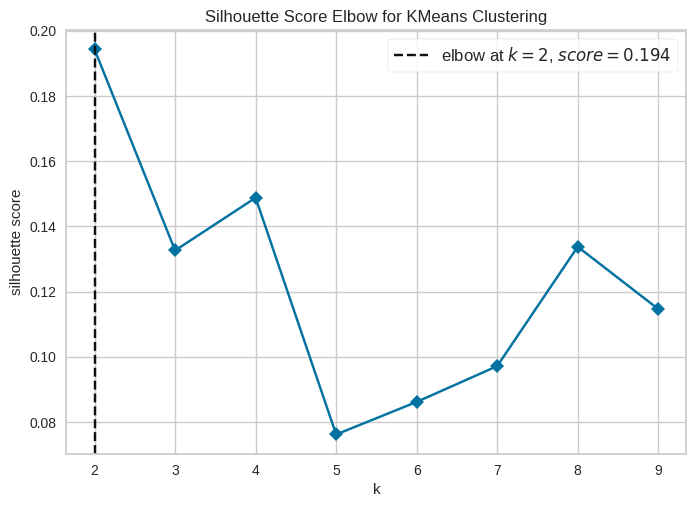

Оптимальна кількість кластерів: 2
Метрика: euclidean, Коефіцієнт силуету: 0.19428692535095587
Метрика: manhattan, Коефіцієнт силуету: 0.28262713700196684
Метрика: cosine, Коефіцієнт силуету: 0.30723801169257137
Найкраща метрика відстані: cosine


In [93]:
optimal_clusters = find_optimal_clusters(data)
print(f"Оптимальна кількість кластерів: {optimal_clusters}")

best_metric, best_model = compare_distance_metrics(data, optimal_clusters)
print(f"Найкраща метрика відстані: {best_metric}")

### 5. Виведення результатів кластеризації

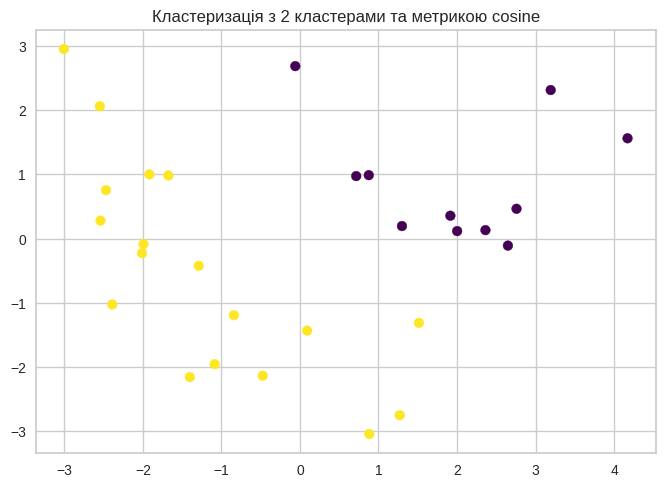

In [98]:
# Зменшимо розмірність даних до 2D за допомогою PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

# Створимо графік для візуалізації кластерів
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=final_clusters, cmap='viridis')

plt.title(f"Кластеризація з {optimal_clusters} кластерами та метрикою {best_metric}")
plt.show()